In [1]:
import math
import numpy as np
# !pip install matplotlib
import matplotlib.pyplot as plt

In [96]:
def newGen(totPop):
    return np.random.randint(totPop-1, size=totPop)

def numType1(cIndividuals):
    return np.sum(cIndividuals)

def numType0(cIndividuals, totPop):
    return totPop - np.sum(cIndividuals)

# WrightFisher by Binomial

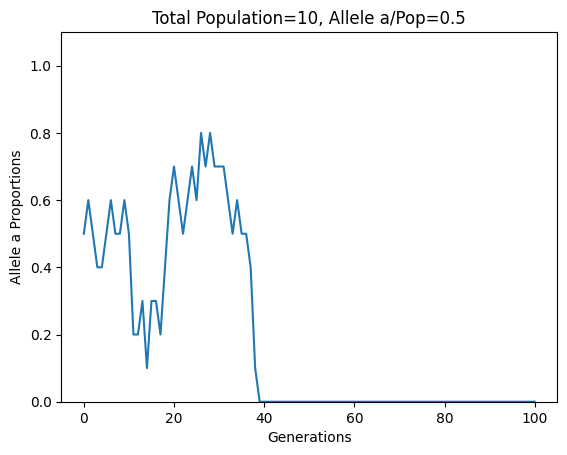

In [139]:
# binomial(#trials, prob, #obs)
def WrightFisherProb(axs, popTotal = 1000, startNum1Prob = 0.3, maxGens = 100, expRepeat = 5, labelAxes= False):
    currProb = np.repeat(startNum1Prob, expRepeat)
    totalProbs = np.empty([maxGens+1, expRepeat])
    totalProbs[0] = currProb
    
    for gen in range(1, maxGens+1):
        currProb = np.random.binomial(popTotal, currProb, expRepeat)/popTotal
        totalProbs[gen] = currProb
        
    # Plotting ...
    genAxis = np.tile(np.arange(maxGens+1), expRepeat).reshape(expRepeat, maxGens+1).T
    probAxis = totalProbs
    
#     fig, axs = plt.subplots()

    axs.plot(genAxis, probAxis)
    axs.set_ylim([0, 1.1])
    if (labelAxes):
        axs.set_title(f"Total Population={popTotal}, Allele a/Pop={startNum1Prob}")
        axs.set_xlabel("Generations")
        axs.set_ylabel("Allele a Proportions")
    
    
#     plt.ylim([0, 1])
#     plt.show()
#     plt.close()
#     axs.close()
    
#     plt.plot(genAxis, probAxis)
#     plt.title(f"Type 1 Population N={popTotal}, p={startNum1Prob}")
#     plt.xlabel("Generations")
#     plt.ylabel("Type 1/Total Pop")

fig, axs = plt.subplots()
WrightFisherProb(axs, popTotal = 10, startNum1Prob = .5, maxGens = 100, expRepeat = 1, labelAxes=True)

## Display different variations (binomial)

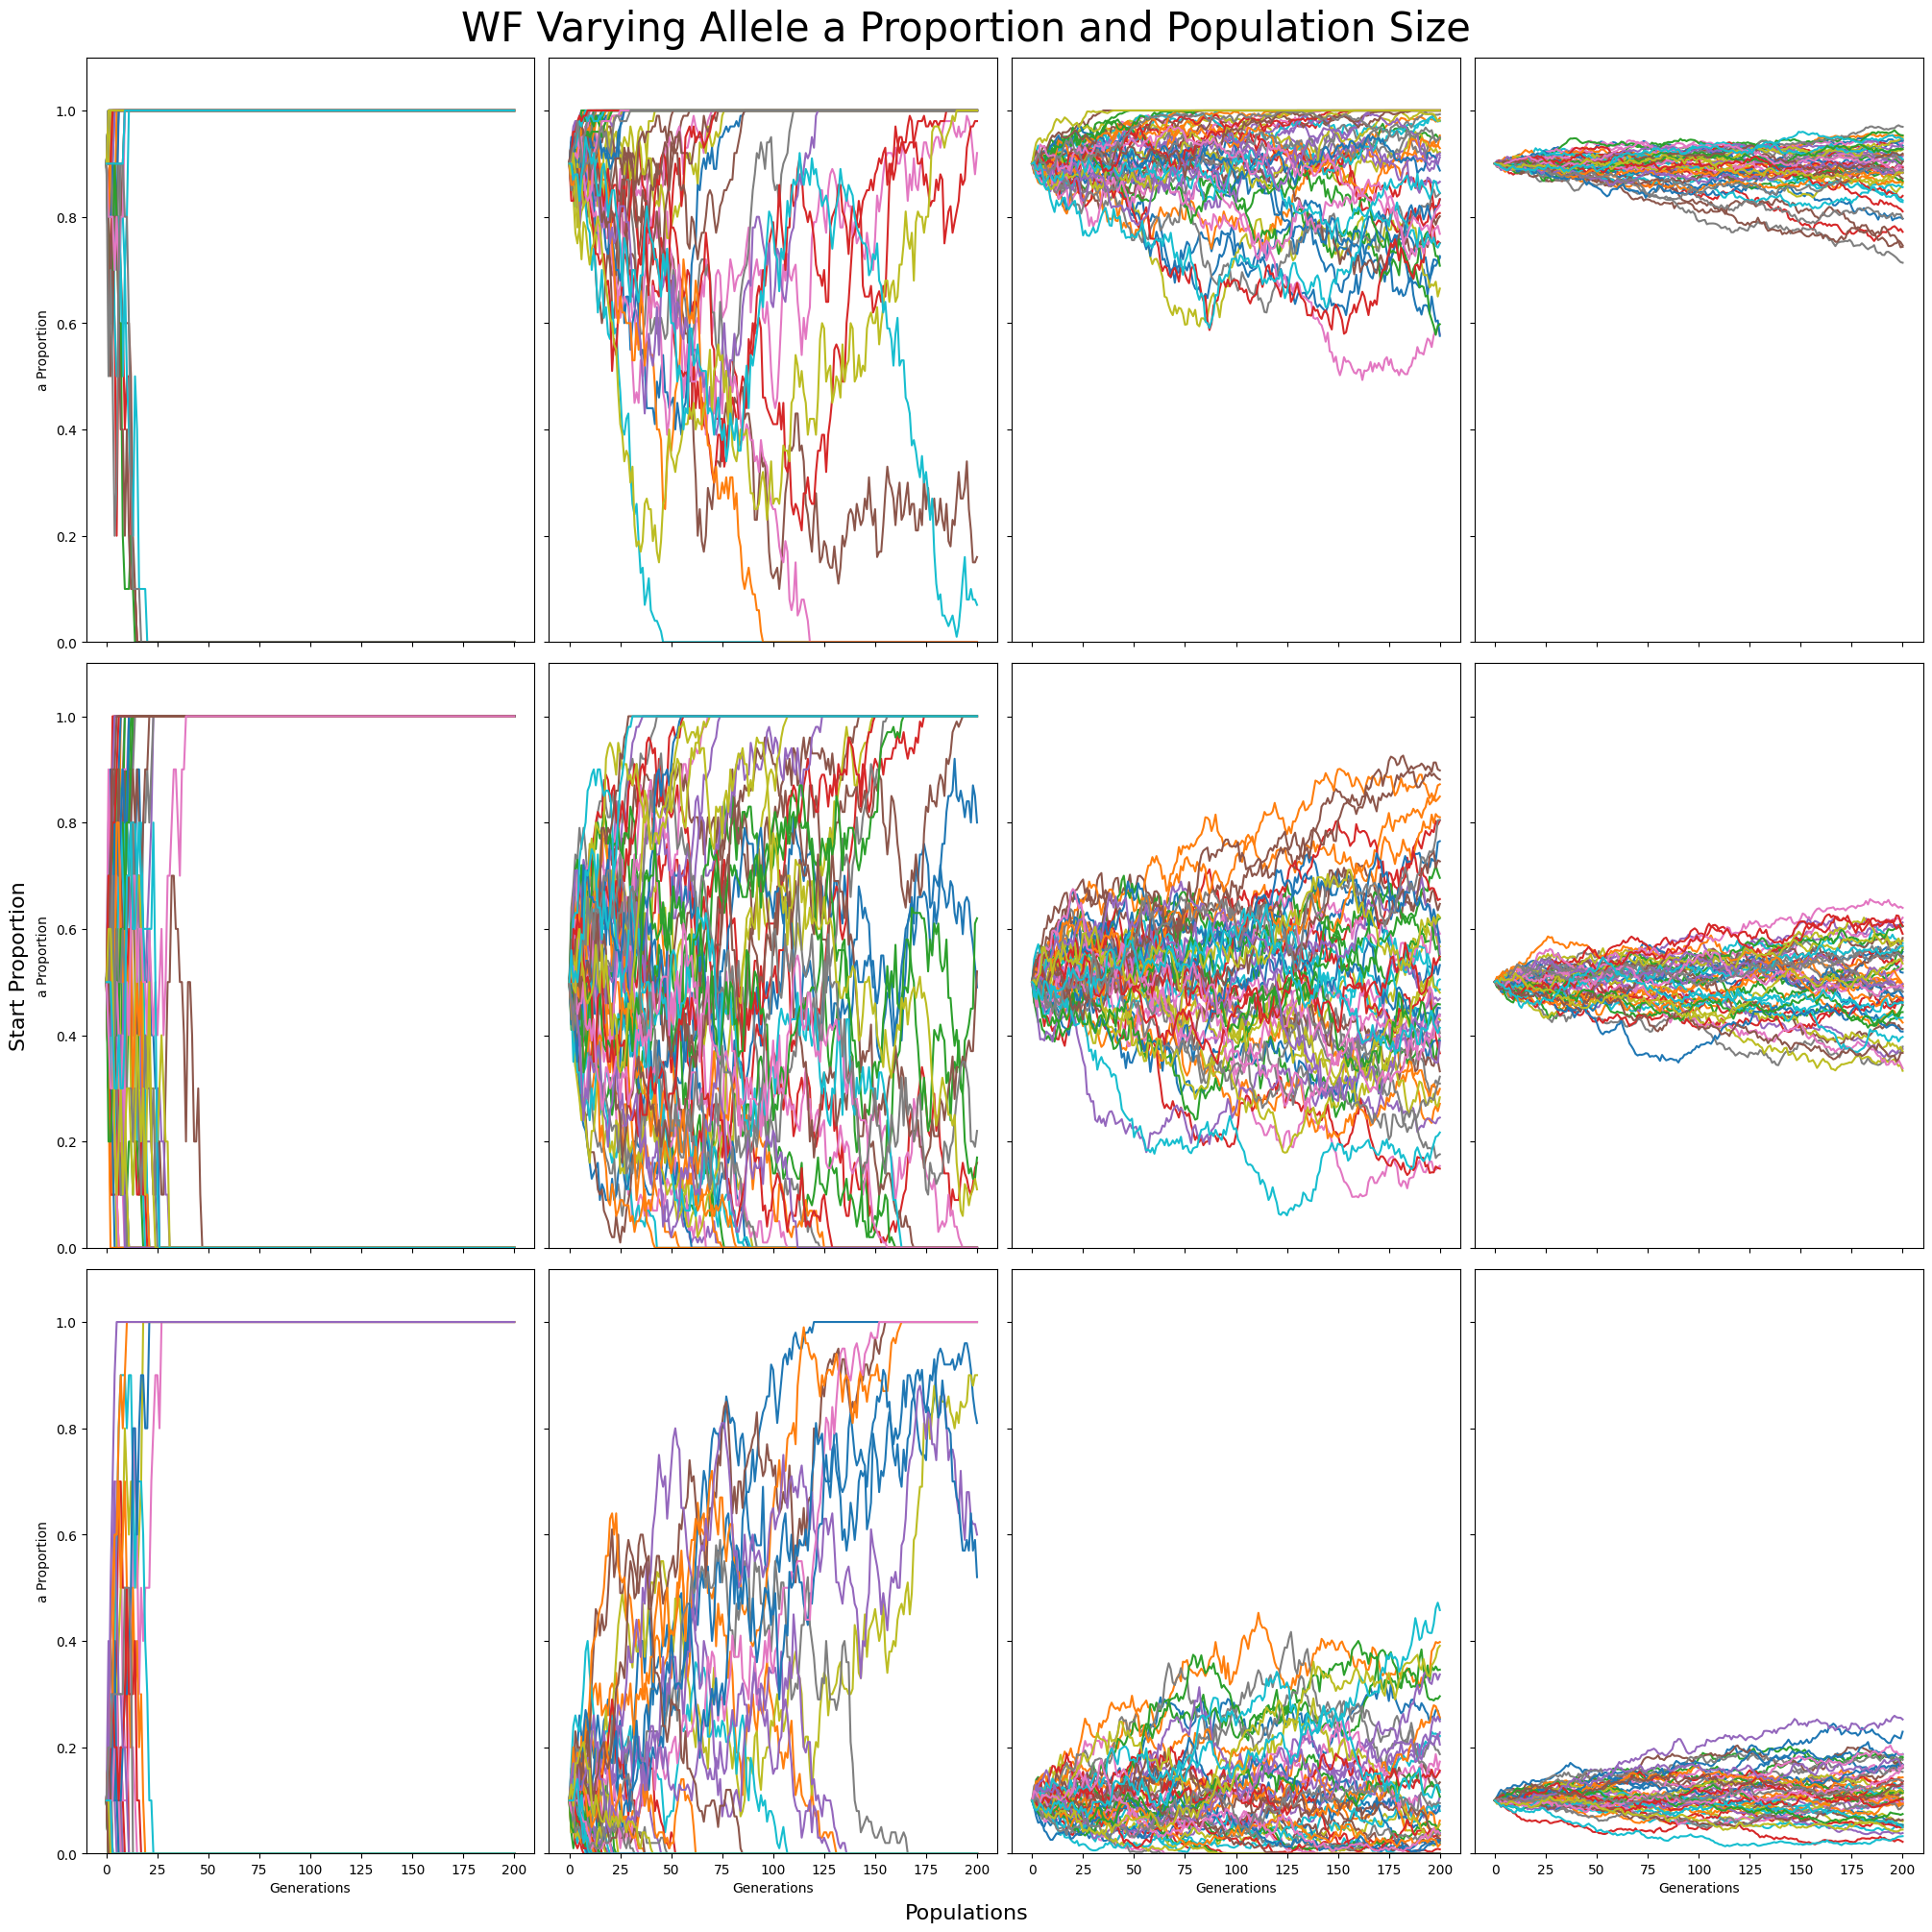

In [144]:
startPercents = np.array([ .9, .5,  .1 ])
popTotals = np.array([10, 100, 1000, 10000], dtype = int)
numPercents, numTotals = startPercents.size, popTotals.size

fig, axs = plt.subplots(numPercents, numTotals, 
                        constrained_layout=True,
                        sharex=True, sharey=True, figsize=(20, 20))
fig.suptitle("WF Varying Allele a Proportion and Population Size", fontsize=30)
fig.supxlabel("Populations", fontsize =16)
fig.supylabel("Start Proportion", fontsize =16)
for pi, percent in enumerate(startPercents):
    for ni, pop in enumerate(popTotals):
        WrightFisherProb(axs[pi, ni],
                         popTotal = pop, 
                         startNum1Prob = percent, 
                         maxGens = 200, 
                         expRepeat = 50)
        axs[numPercents-1, ni].set_xlabel("Generations")
    axs[pi, 0].set_ylabel("a Proportion")
                         

# WrightFisher by random choice

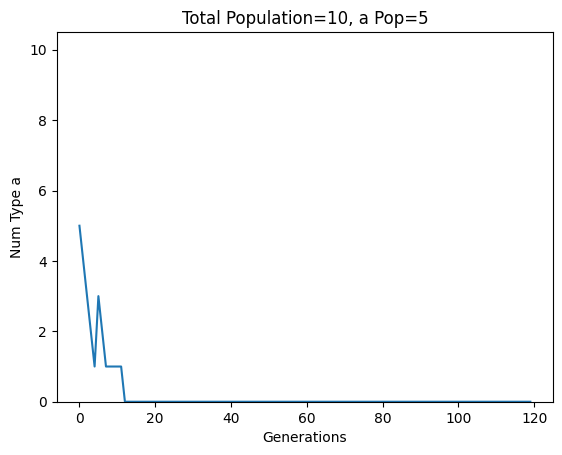

In [132]:
def WrightFisherNums(axs, popTotal = 10000, startNum1 = 1000, maxGens = 100, expRepeat = 10, labelAxes= False):
    for rep in range(expRepeat):
        currPop = np.concatenate((np.zeros(popTotal - startNum1, dtype=int), np.ones(startNum1, dtype=int)), axis=None)

        # save number of 1 and 0 allelles through the generations
        num1s = np.zeros(maxGens, dtype=int)

        for gen in range(maxGens):
            currTotN1 = numType1(currPop)
            currTotN0 = popTotal - currTotN1
#             currPop = newGen(currPop, popTotal)
            currPop = currPop[newGen(popTotal)]

            num1s[gen] = currTotN1


        # Graph...
        numIdx = np.arange(maxGens)
        axs.plot(numIdx, num1s)
        axs.set_ylim([0, popTotal+(popTotal/20)])
        if (labelAxes):
            axs.set_title(f"Total Population={popTotal}, a Pop={startNum1}")
            axs.set_xlabel("Generations")
            axs.set_ylabel("Num Type a")

    #     fig, axs = plt.subplots()
    #     axs.set_title(f"WF Allele 1: {startNum1}/{popTotal} | Gen: {maxGens}")
    #     axs.plot(numIdx, num1s, label="Type 1")
    #     axs.plot(numIdx, num0s, label="Type 0")
    #     axs.set_xlabel("Generations")
    #     axs.set_ylabel("Num Individuals")
    #     axs.legend()
    
    
    
        #label: label=f"{startNum1/popTotal}-{rep}"
#         plt.plot(numIdx, num1s)
#         plt.title("Type Population")
#         plt.xlabel("Generations")
#         plt.ylabel("Num Individuals")
# #         plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#         plt.ylim([0, popTotal])
#         plt.xlim([0, maxGens])
#     plt.show()
#     plt.close()

fig, axs = plt.subplots()
WrightFisherNums(axs, popTotal = 10, startNum1 = 5, maxGens = 120, expRepeat = 1, labelAxes=True)

## Display different variations (random choice)

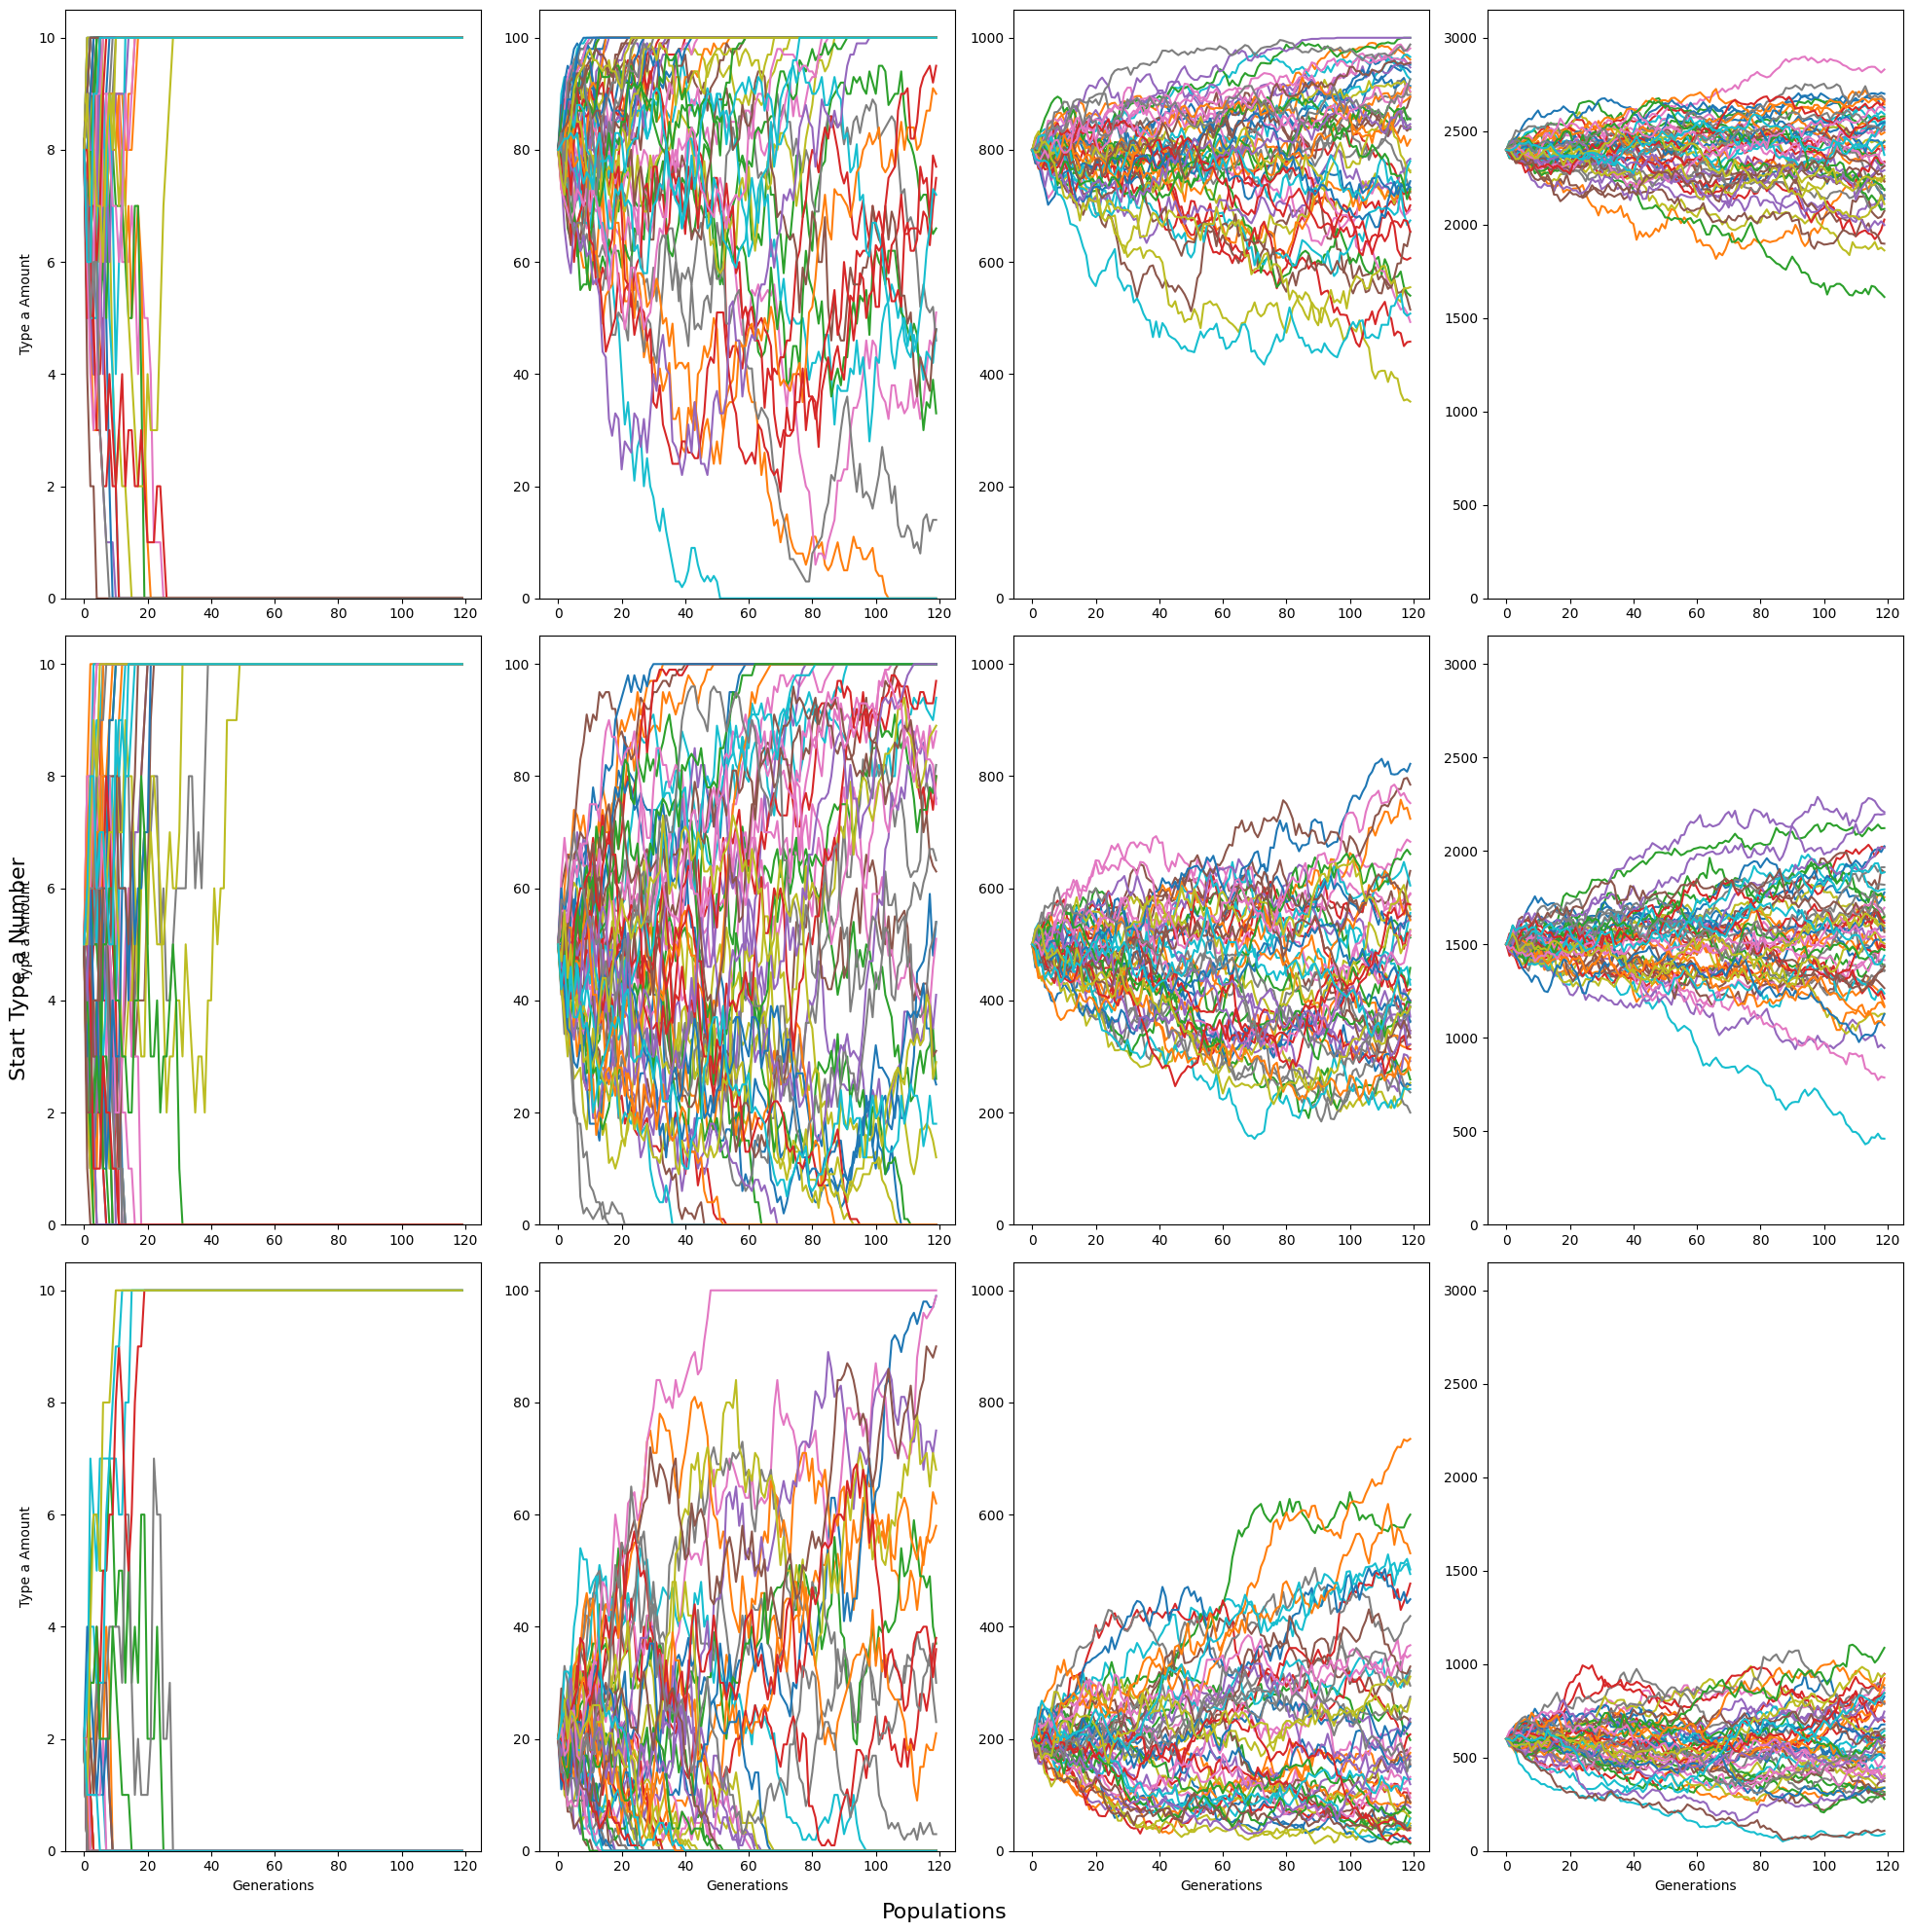

In [131]:
# LABELED
startPercents = np.array([ .8, .5,  .2 ])
popTotals = np.array([10, 100, 1000, 3000], dtype = int)
numPercents, numTotals = startPercents.size, popTotals.size

fig, axs = plt.subplots(numPercents, numTotals, 
                        constrained_layout=True,  tight_layout=True,
                        figsize=(20, 20))
fig.supxlabel("Populations", fontsize =16)
fig.supylabel("Start Type a Number", fontsize =16)

for pi, percent in enumerate(startPercents):
    for ni, pop in enumerate(popTotals):
        WrightFisherNums(axs[pi, ni],
                         popTotal = pop,
                         startNum1 = int(pop*percent),
                         maxGens = 120,
                         expRepeat = 50)
        axs[numPercents-1, ni].set_xlabel("Generations")
    axs[pi, 0].set_ylabel("Type a Amount")